In [8]:
import math
import fuzzylogic as fuzzy

from fuzzylogic.classes import Domain
import fuzzylogic.functions as ff

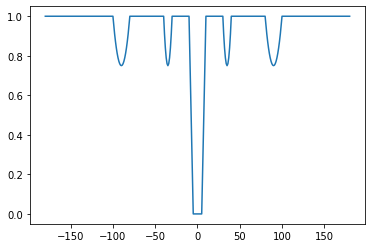

In [18]:
DEGTORAD = math.pi/180.0
RADTODEG = 180.0*math.pi

Ang = Domain("d_theta", -180, 180, res=1)
Ang.zero = ff.triangular(-3,3)

Ang.p_small = ff.trapezoid(0, 3, 5, 10)
Ang.n_small = ff.trapezoid(-10,-5,-3,0)

Ang.small = Ang.p_small | Ang.n_small

Ang.p_med = ff.trapezoid(5, 10, 30, 40)
Ang.n_med = ff.trapezoid(-40,-30,-10,-5)

Ang.med = Ang.p_med | Ang.n_med

Ang.p_big = ff.trapezoid(30, 40, 80, 100)
Ang.n_big = ff.trapezoid(-100, -80, -40, -30)

Ang.big = Ang.p_big | Ang.n_big

Ang.p_large = ff.trapezoid(80, 100, 180, 190)
Ang.n_large = ff.trapezoid(-190, -180, -100, -80)

Ang.large = Ang.p_large | Ang.n_large

Ang.big_part = Ang.med + Ang.big + Ang.large
Ang.big_part.normalized().plot()

Dist = Domain("distance", 0, 8.0, res =0.05)
Dist.zero = ff.S(0, 0.05)
Dist.small = ff.trapezoid(0, 0.05, 0.2, 0.25)
Dist.med = ff.trapezoid(0.2, 0.25, 0.9, 1.1)
Dist.big = ff.trapezoid(0.9, 1.1, 3.5, 4.5)
Dist.large = ff.trapezoid(3.5, 4.5, 8.0, 9.0)

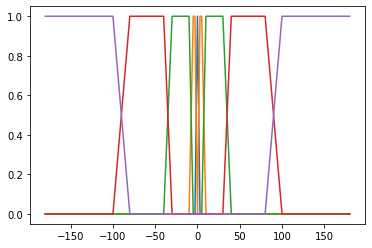

In [10]:
Ang.zero.plot()
Ang.small.plot()
Ang.med.plot()
Ang.big.plot()
Ang.large.plot()

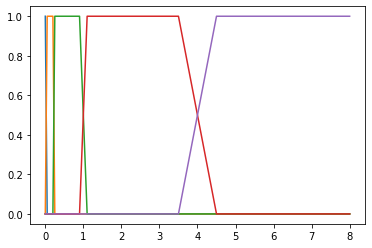

In [11]:
Dist.zero.plot()
Dist.small.plot()
Dist.med.plot()
Dist.big.plot()
Dist.large.plot()

In [12]:
Dist(0.04)

{'zero': 0.20000000000000007, 'small': 0.8, 'med': 0, 'big': 0, 'large': 0}

In [13]:
for i in range(-6,6):
    print(str(i*30) + "\t" + str(clamp(i*math.pi/6.0)))

-180	-3.141592653589793
-150	-2.6179938779914944
-120	-2.0943951023931953
-90	-1.5707963267948966
-60	-1.0471975511965974
-30	-0.5235987755982987
0	0.0
30	0.5235987755982987
60	1.0471975511965974
90	1.5707963267948966
120	2.094395102393195
150	2.617993877991495


In [14]:
def clamp(value, min_ = -math.pi, max_ = math.pi):
    modded = (value - min_)%(max_ - min_)
    return modded + min_